<a href="https://colab.research.google.com/github/MohamedddWael/Augmented_Reality_and_Image_Mosaics/blob/main/Augmented_Reality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Augmented Reality

**This project includes the following steps:**


1. Finding correspondances between target book image and first frame in the book.mov video
2. Computing the Homography Matrix
3. Calculating book co-ordinates in the video
4. Cropping Ar video frames
5. Overlayying frames from the ar_source.mov video on the book.mov video (Augmented Reality Application)



In [30]:
#IMPORTING REQUIRED DEPENDENCIES
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import random

### 1. Finding correspondances between target book image and first frame from the book.mov video

In [27]:
# Utility function for extracting frames from a video
def extract_frames(video_path):
  vidcap = cv2.VideoCapture(video_path)
  success,image = vidcap.read()
  frames = []
  count = 0
  while success:
    frames.append(image)
    success,image = vidcap.read()
    count += 1
  return frames

#test
#frames = extract_frames('book.mov')
#print(len(frames))
#cv2_imshow(frames[0])

In [28]:
def extract_correspondances(image1, image2, threshold= 0.75):
  sift = cv2.SIFT_create()

  # find the keypoints and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(image1,None)
  kp2, des2 = sift.detectAndCompute(image2,None)

  # BFMatcher with default params
  bf = cv2.BFMatcher()
  matches = bf.knnMatch(des1,des2,k=2)

  # Apply ratio test
  good = []
  for m,n in matches:
      if m.distance < (threshold * n.distance):
          good.append([m])
  good = random.sample(good, 50)
  return kp1, kp2, good

def draw_correspondances(img1, kp1, img2, kp2, good):
  img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  plt.imshow(img3),plt.show()

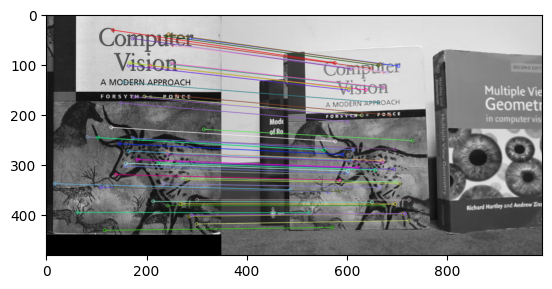

In [29]:
frames = extract_frames('book.mov')
image1 = cv2.imread('target_book.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)
kp1, kp2, good = extract_correspondances(image1, image2)
draw_correspondances(image1, kp1, image2, kp2, good)